In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/CovidPrediction/

/content/drive/MyDrive/CovidPrediction


# Preprocessing Observations
We need the following Observations:
- number of deaths (from Deaths_over_time.csv)
- number of tests (test_pos_over_time.csv, test_pos_over_time_antigen.csv)
- number of hospitalizations (newly_admitted_over_time.csv)
- number of sero positives (?)

Create Dataframes

In [ ]:
df_deaths = pd.read_csv('data/overvaagningsdata-covid19-17052021-hb41/Deaths_over_time.csv', sep=';', thousands='.', decimal=',')
df_deaths.rename(columns={'Dato':'Date', 'Antal_døde':'Number_of_deaths'}, inplace=True)
df_deaths.drop(df_deaths.tail(1).index,inplace=True) # drop last row
df_deaths.tail(3)

,Date,Number_of_deaths
430,2021-05-15,0
431,2021-05-16,1
432,2021-05-17,0


In [ ]:
df_tests_pcr = pd.read_csv('data/overvaagningsdata-covid19-17052021-hb41/Test_pos_over_time.csv', sep=';', thousands='.', decimal=',')
df_tests_pcr.drop(df_tests_pcr.tail(2).index,inplace=True) # drop last 2 rows
df_tests_pcr.drop(columns={'NotPrevPos', 'PrevPos', 'Tested_kumulativ'}, inplace=True)
df_tests_pcr.tail(3)

,Date,NewPositive,PosPct,Tested
473,2021-05-14,875,0.5,167338
474,2021-05-15,936,0.7,139267
475,2021-05-16,275,0.6,49910


In [ ]:
df_tests_antigen = pd.read_csv('data/overvaagningsdata-covid19-17052021-hb41/Test_pos_over_time_antigen.csv', sep=';', thousands='.', decimal=',')
df_tests_antigen.drop(df_tests_antigen.tail(2).index,inplace=True) # drop last 2 rows
df_tests_antigen.drop(columns={'NotPrevPos', 'PrevPos', 'Tested_kumulativ'}, inplace=True)
df_tests_antigen.tail(3)

,Date,NewPositive,PosPct,Tested
401,2021-05-14,365,0.1,322404
402,2021-05-15,302,0.1,263018
403,2021-05-16,341,0.1,304357


In [ ]:
df_hospitalizations = pd.read_csv('data/overvaagningsdata-covid19-17052021-hb41/Newly_admitted_over_time.csv', sep=';', thousands='.', decimal=',', dtype={'Total': np.int32})
df_hospitalizations.drop(columns={'Hovedstaden', 'Sjælland', 'Syddanmark', 'Midtjylland', 'Nordjylland', 'Ukendt Region'}, inplace=True)
df_hospitalizations.rename(columns={'Dato':'Date', 'Total':'Number_of_hospitalizations'}, inplace=True)
df_hospitalizations.tail(3)

,Date,Number_of_hospitalizations
439,2021-05-14,46
440,2021-05-15,32
441,2021-05-16,27


Merge Dataframes

In [ ]:
df_death_hosp = pd.merge(df_deaths, df_hospitalizations, how='left', on='Date')
df_tests = pd.merge(df_tests_pcr, df_tests_antigen, how='left', on='Date', suffixes=('_pcr', '_antigen'))
df_obs = pd.merge(df_death_hosp, df_tests, how='inner', on='Date')
df_obs.fillna(value=0, inplace=True)
df_obs.head()

,Date,Number_of_deaths,Number_of_hospitalizations,NewPositive_pcr,PosPct_pcr,Tested_pcr,NewPositive_antigen,PosPct_antigen,Tested_antigen
0,2020-03-11,1,10.0,207,23.6,882,0.0,0.0,0.0
1,2020-03-12,0,18.0,44,6.6,676,0.0,0.0,0.0
2,2020-03-13,0,26.0,33,4.7,710,0.0,0.0,0.0
3,2020-03-14,1,24.0,37,6.4,583,0.0,0.0,0.0
4,2020-03-15,2,33.0,45,6.2,726,0.0,0.0,0.0


Save Dataframe in new xlsx

In [ ]:
#df_obs.to_excel('data/observations.xlsx')

# Preprocessing Google Mobility Data

## 2020 Data

In [18]:
df_google_dk_2020 = pd.read_csv('data/Google_Region_Mobility/Denmark/2020_DK_Region_Mobility_Report.csv', sep=';', decimal='.')
df_google_dk_2020.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,DK,Denmark,NaN,NaN,NaN,NaN,NaN,ChIJ-1-U7rYnS0YRzZLgw9BDh1I,15.02.20,-2.0,-1.0,-4.0,2.0,-6.0,0.0
1,DK,Denmark,NaN,NaN,NaN,NaN,NaN,ChIJ-1-U7rYnS0YRzZLgw9BDh1I,16.02.20,-7.0,-7.0,-33.0,-5.0,-6.0,1.0
2,DK,Denmark,NaN,NaN,NaN,NaN,NaN,ChIJ-1-U7rYnS0YRzZLgw9BDh1I,17.02.20,-3.0,-1.0,0.0,-3.0,-2.0,1.0


## 2021 Data

In [19]:
df_google_dk_2021 = pd.read_csv('data/Google_Region_Mobility/Denmark/2021_DK_Region_Mobility_Report.csv', sep=',', decimal='.')
df_google_dk_2021.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,DK,Denmark,NaN,NaN,NaN,NaN,NaN,ChIJ-1-U7rYnS0YRzZLgw9BDh1I,2021-01-01,-79.0,-74.0,17.0,-71.0,-88.0,23.0
1,DK,Denmark,NaN,NaN,NaN,NaN,NaN,ChIJ-1-U7rYnS0YRzZLgw9BDh1I,2021-01-02,-53.0,-19.0,34.0,-54.0,-27.0,10.0
2,DK,Denmark,NaN,NaN,NaN,NaN,NaN,ChIJ-1-U7rYnS0YRzZLgw9BDh1I,2021-01-03,-43.0,-21.0,20.0,-53.0,-21.0,8.0


## Transform Data

In [22]:
place_id = 'ChIJ-1-U7rYnS0YRzZLgw9BDh1I'
cols_to_keep = ['country_region', 'date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
                'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline',
                'residential_percent_change_from_baseline']

In [23]:
def preprocess_mobility_data(dataframe, place_id, columns_to_keep):
  dataframe['date'] = pd.to_datetime(dataframe['date'])
  dataframe = dataframe[dataframe['place_id']==place_id]
  dataframe = dataframe[cols_to_keep]
  return dataframe

In [24]:
df_google_dk_2020 = preprocess_mobility_data(df_google_dk_2020, place_id, cols_to_keep)
df_google_dk_2020.head(3)

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Denmark,2020-02-15,-2.0,-1.0,-4.0,2.0,-6.0,0.0
1,Denmark,2020-02-16,-7.0,-7.0,-33.0,-5.0,-6.0,1.0
2,Denmark,2020-02-17,-3.0,-1.0,0.0,-3.0,-2.0,1.0


In [25]:
df_google_dk_2020.shape

(321, 8)

In [26]:
df_google_dk_2021 = preprocess_mobility_data(df_google_dk_2021, place_id, cols_to_keep)
df_google_dk_2021.head(3)

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Denmark,2021-01-01,-79.0,-74.0,17.0,-71.0,-88.0,23.0
1,Denmark,2021-01-02,-53.0,-19.0,34.0,-54.0,-27.0,10.0
2,Denmark,2021-01-03,-43.0,-21.0,20.0,-53.0,-21.0,8.0


In [27]:
df_google_dk_2021.shape

(155, 8)

## Concat 2020 & 2021

In [29]:
df_google_dk = pd.concat([df_google_dk_2020, df_google_dk_2021], ignore_index=True)
df_google_dk.shape

(476, 8)

In [30]:
df_google_dk

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Denmark,2020-02-15,-2.0,-1.0,-4.0,2.0,-6.0,0.0
1,Denmark,2020-02-16,-7.0,-7.0,-33.0,-5.0,-6.0,1.0
2,Denmark,2020-02-17,-3.0,-1.0,0.0,-3.0,-2.0,1.0
3,Denmark,2020-02-18,1.0,1.0,9.0,-1.0,-1.0,1.0
4,Denmark,2020-02-19,0.0,0.0,12.0,-2.0,-1.0,1.0
...,...,...,...,...,...,...,...,...
471,Denmark,2021-05-31,21.0,14.0,205.0,-19.0,-15.0,3.0
472,Denmark,2021-06-01,17.0,15.0,169.0,-17.0,-14.0,3.0
473,Denmark,2021-06-02,13.0,12.0,145.0,-21.0,-14.0,4.0
474,Denmark,2021-06-03,15.0,13.0,166.0,-19.0,-14.0,3.0


In [37]:
df_google_dk.to_excel('data/denmark_google_mobility.xlsx')

# Visualization

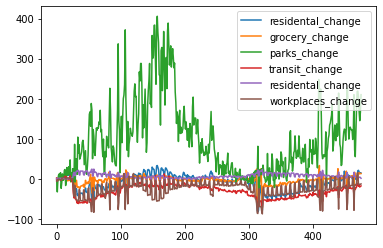

In [39]:
plt.plot(df_google_dk['retail_and_recreation_percent_change_from_baseline'], label='residental_change')
plt.plot(df_google_dk['grocery_and_pharmacy_percent_change_from_baseline'], label='grocery_change')
plt.plot(df_google_dk['parks_percent_change_from_baseline'], label='parks_change')
plt.plot(df_google_dk['transit_stations_percent_change_from_baseline'], label='transit_change')
plt.plot(df_google_dk['residential_percent_change_from_baseline'], label='residental_change')
plt.plot(df_google_dk['workplaces_percent_change_from_baseline'], label='workplaces_change')
plt.legend()
plt.show()